## <font color="blue">Data loading strategy for three datasets</font>

We used IPython's storemagic function (https://ipython.readthedocs.io/en/stable/config/extensions/storemagic.html) for the persistence storage of data. Here are the steps we followed.
1. Run each person's Project3.ipynb file individually with our own credentials for WRDS and our own FRED api key to get the merged data from FRED and WRDS for each person. For example, I ran Parimala's and Samuel's Project3.ipynb file with my WRDS credentials and my own FRED api key (without changing any other code).
2. Then, we execute the following code at the end of each person's file for persistent storage. Here is the code executed.
   > Sitanshu's file<br>
   > `%store dff_econ_ann2_real_estate_agts_n_mgr_wo_na` <br><br>
   > Samuel's file<br>
   > `%store econ_2010_2023`<br><br>
   > Parimala's file<br>
   > `%store econ_r`
3. We are loading data to this file using `%store -r`

<font color="red">**Important Note: Since both Samuel and Parimala are taking data from 2010 to 2022, I am also taking data within that range. Earlier I was targeting the 2010 to 2021 range.**</font>

In [1]:
# Import required libraries
import pandas as pd # Alias pandas as pd
import numpy as np # Alias NumPy as np

### <font color="blue">Load data<font>

In [2]:
# Load data to dataframes.
%store -r

##### <font color="green">Verify data is loaded.</font>

In [3]:
# Verify interest rate data
dff_econ_ann2_real_estate_agts_n_mgr_wo_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            248 non-null    int32         
 1   effective_rate  248 non-null    float64       
 2   cik             248 non-null    object        
 3   gvkey           248 non-null    object        
 4   datadate        248 non-null    datetime64[ns]
 5   conm            248 non-null    object        
 6   revt            248 non-null    float64       
 7   ni              248 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 16.5+ KB


In [4]:
# Verify labor force data.
econ_2010_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          248 non-null    int32         
 1   house income  248 non-null    float64       
 2   index         248 non-null    int64         
 3   cik           248 non-null    object        
 4   gvkey         248 non-null    object        
 5   date          248 non-null    datetime64[ns]
 6   conm          248 non-null    object        
 7   revt          248 non-null    float64       
 8   ni            248 non-null    float64       
 9   month         248 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(3)
memory usage: 17.6+ KB


In [5]:
# Verify population-level data
econ_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  248 non-null    int32         
 1   Thousands of Persons  248 non-null    float64       
 2   cik                   248 non-null    object        
 3   gvkey                 248 non-null    object        
 4   datadate              248 non-null    datetime64[ns]
 5   conm                  248 non-null    object        
 6   revt                  248 non-null    float64       
 7   ni                    248 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 14.7+ KB


## <font color="red">Merge data</font>

#### <font color="blue">Preview impact of merging interest rates and labour force data</font>

First, we explore different join types by reviewing how they affect the merged dataset.

In [6]:
# Review the shape of data after left join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="left", on=["year","gvkey"]
).shape

(248, 16)

In [10]:
# Verify the data after left join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="left", on=["year","gvkey"]
).head()

,year,effective_rate,cik_x,gvkey,datadate,conm_x,revt_x,ni_x,house income,index,cik_y,date,conm_y,revt_y,ni_y,month
0,2010,0.176247,0001328208,165463,2010-12-31,GOLDEN GATE PARTNERS INC,0.652,-0.705,2302.333333,102,0001328208,2010-12-31,GOLDEN GATE PARTNERS INC,0.652,-0.705,12
1,2010,0.176247,0001477324,184116,2010-12-31,IFM INVESTMENTS LTD,80.429,-24.581,2302.333333,157,0001477324,2010-12-31,IFM INVESTMENTS LTD,80.429,-24.581,12
2,2010,0.176247,0001497862,185854,2010-12-31,SYSWIN INC -ADR,95.306,28.725,2302.333333,109,0001497862,2010-12-31,SYSWIN INC -ADR,95.306,28.725,12
3,2010,0.176247,0001408100,025632,2010-12-31,KENNEDY-WILSON HOLDINGS INC,50.536,3.506,2302.333333,78,0001408100,2010-12-31,KENNEDY-WILSON HOLDINGS INC,50.536,3.506,12
4,2010,0.176247,0001033032,064867,2010-12-31,SILVERLEAF RESORTS INC,226.011,5.775,2302.333333,42,0001033032,2010-12-31,SILVERLEAF RESORTS INC,226.011,5.775,12


#### <font color="green">Analysis on data</font>

We have three observations:
1. Same data columns are duplicated with suffix _x and _y from left and right datasets respectively.
2. **datadate** and **date** columns in datasets have the same values but use different names.
3. Columns included in merge are not duplicated.

### <font color="blue">Fix the column name by using same name for same data</font>

We have two datasets that uses **datadate** column, whereas the Labor force dataset uses column name as **date**. So, we rename date column in labor force dataset to "datadate" to match with other datasets.

In [15]:
# Rename the date column to datadate in the labor force dataset.
econ_2010_2023 = econ_2010_2023.rename(columns={'date':'datadate'})

In [16]:
econ_2010_2023

,year,house income,index,cik,gvkey,datadate,conm,revt,ni,month
0,2010,2302.333333,42,0001033032,064867,2010-12-31,SILVERLEAF RESORTS INC,226.011,5.775,12
1,2010,2302.333333,43,0001361658,174729,2010-12-31,TRAVEL PLUS LEISURE CO,3851.000,379.000,12
2,2010,2302.333333,56,0001405658,178093,2010-12-31,E-HOUSE CHINA HOLDINGS -ADR,356.526,36.155,12
3,2010,2302.333333,78,0001408100,025632,2010-12-31,KENNEDY-WILSON HOLDINGS INC,50.536,3.506,12
4,2010,2302.333333,102,0001328208,165463,2010-12-31,GOLDEN GATE PARTNERS INC,0.652,-0.705,12
...,...,...,...,...,...,...,...,...,...,...
243,2022,1571.583333,202,0001037976,065108,2022-12-31,JONES LANG LASALLE INC,20862.100,654.500,12
244,2022,1571.583333,218,0001596856,020009,2022-12-31,LEJU HOLDINGS LTD -ADR,343.182,-89.668,12
245,2022,1571.583333,221,0001862461,037198,2022-12-31,REAL BROKERAGE INC (THE),381.756,-20.577,12
246,2022,1571.583333,223,0001946216,041824,2022-12-31,SYLA TECHNOLOGIE CO LTD -ADR,167.253,2.995,12


#### <font color="blue">Resume merging verification</font>

In [17]:
# Review the shape of data after left join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="left", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [21]:
# Review NaN data after left join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="left", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year              0
effective_rate    0
cik               0
gvkey             0
datadate          0
conm              0
revt              0
ni                0
house income      0
index             0
month             0
dtype: int64

In [18]:
# Review the shape of data after inner join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [22]:
# Review NaN data after inner join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year              0
effective_rate    0
cik               0
gvkey             0
datadate          0
conm              0
revt              0
ni                0
house income      0
index             0
month             0
dtype: int64

In [19]:
# Review the shape of data after outer join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="outer", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [23]:
# Review NaN data after outer join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="outer", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year              0
effective_rate    0
cik               0
gvkey             0
datadate          0
conm              0
revt              0
ni                0
house income      0
index             0
month             0
dtype: int64

In [20]:
# Review the shape of data after right join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="right", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [24]:
# Review NaN data after right join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="right", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year              0
effective_rate    0
cik               0
gvkey             0
datadate          0
conm              0
revt              0
ni                0
house income      0
index             0
month             0
dtype: int64

#### <font color="green">Analysis before merging.</font>

All joins yield the same number of rows and none of the joins leads to null values, we can apply any type of join here. I am going ahead with **inner join** as it brings common data and does not incur any loss or missing values.

#### <font color="blue">Merging interest rate and labor force datasets.</font>

In [34]:
# Merging interest rate and labor force data.
dff_labor_force_econ = pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_2010_2023, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
)

In [35]:
# Verify the summary of data after merging datasets.
dff_labor_force_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            248 non-null    int32         
 1   effective_rate  248 non-null    float64       
 2   cik             248 non-null    object        
 3   gvkey           248 non-null    object        
 4   datadate        248 non-null    datetime64[ns]
 5   conm            248 non-null    object        
 6   revt            248 non-null    float64       
 7   ni              248 non-null    float64       
 8   house income    248 non-null    float64       
 9   index           248 non-null    int64         
 10  month           248 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(3)
memory usage: 19.5+ KB


#### <font color="red">Save merged dataset to persistent storage.</font>

In [36]:
# Save to persistent storage.
%store dff_labor_force_econ

Stored 'dff_labor_force_econ' (DataFrame)


#### <font color="blue">Preview impact of merging interest rates and population level</font>

First, we explore different join types by reviewing how they affect the merged dataset.

In [28]:
# Review the shape of data after left join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="left", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 9)

In [29]:
# Review NaN data after left join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="left", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year                    0
effective_rate          0
cik                     0
gvkey                   0
datadate                0
conm                    0
revt                    0
ni                      0
Thousands of Persons    0
dtype: int64

In [30]:
# Review the shape of data after inner join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 9)

In [31]:
# Review NaN data after inner join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year                    0
effective_rate          0
cik                     0
gvkey                   0
datadate                0
conm                    0
revt                    0
ni                      0
Thousands of Persons    0
dtype: int64

In [32]:
# Review the shape of data after outer join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="outer", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 9)

In [33]:
# Review NaN data after outer join.
pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="outer", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year                    0
effective_rate          0
cik                     0
gvkey                   0
datadate                0
conm                    0
revt                    0
ni                      0
Thousands of Persons    0
dtype: int64

#### <font color="green">Analysis before merging interest rates and population level datasets.</font>

Like the earlier merge of interest rates and labor force dataset merge, all joins yield the same number of rows and none of the joins leads to null values, we can apply any type of join here. I am going ahead with **inner join**.

In [37]:
# Merging interest rate and population level data.
dff_population_lvl_econ = pd.merge(
    dff_econ_ann2_real_estate_agts_n_mgr_wo_na, econ_r, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
)

In [38]:
# Verify the summary of data after merging datasets.
dff_population_lvl_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  248 non-null    int32         
 1   effective_rate        248 non-null    float64       
 2   cik                   248 non-null    object        
 3   gvkey                 248 non-null    object        
 4   datadate              248 non-null    datetime64[ns]
 5   conm                  248 non-null    object        
 6   revt                  248 non-null    float64       
 7   ni                    248 non-null    float64       
 8   Thousands of Persons  248 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(3)
memory usage: 16.6+ KB


#### <font color="red">Save merged interest rates and population level dataset to persistent storage.</font>

In [39]:
%store dff_population_lvl_econ

Stored 'dff_population_lvl_econ' (DataFrame)


#### <font color="blue">Merging population level and labor force datasets.</font>

#### <font color="blue">Preview impact of merging population level and labor force datasets</font>

First, we explore different join types by reviewing how they affect the merged dataset.

In [41]:
# Review the shape of data after left join.
pd.merge(
    econ_r, econ_2010_2023, how="left", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [42]:
# Review NaN data after left join.
pd.merge(
    econ_r, econ_2010_2023, how="left", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year                    0
Thousands of Persons    0
cik                     0
gvkey                   0
datadate                0
conm                    0
revt                    0
ni                      0
house income            0
index                   0
month                   0
dtype: int64

In [43]:
# Review the shape of data after inner join.
pd.merge(
    econ_r, econ_2010_2023, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [44]:
# Review NaN data after inner join.
pd.merge(
    econ_r, econ_2010_2023, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year                    0
Thousands of Persons    0
cik                     0
gvkey                   0
datadate                0
conm                    0
revt                    0
ni                      0
house income            0
index                   0
month                   0
dtype: int64

In [45]:
# Review the shape of data after outer join.
pd.merge(
    econ_r, econ_2010_2023, how="outer", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).shape

(248, 11)

In [46]:
# Review NaN/mising data after outer join.
pd.merge(
    econ_r, econ_2010_2023, how="outer", on=["year","gvkey","datadate","cik","conm","revt","ni"]
).isnull().sum()

year                    0
Thousands of Persons    0
cik                     0
gvkey                   0
datadate                0
conm                    0
revt                    0
ni                      0
house income            0
index                   0
month                   0
dtype: int64

#### <font color="green">Analysis before merging population level and labor flows datasets.</font>

Like the earlier merged datasets, all joins yield the same number of rows and none of the joins leads to null values, we can apply any type of join here. I am going ahead with **inner join**.

In [47]:
# Merging interest rate and population level data.
population_lvl_labor_flow_econ = pd.merge(
    econ_r, econ_2010_2023, how="inner", on=["year","gvkey","datadate","cik","conm","revt","ni"]
)

# Verify the summary of data after merging datasets.
population_lvl_labor_flow_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  248 non-null    int32         
 1   Thousands of Persons  248 non-null    float64       
 2   cik                   248 non-null    object        
 3   gvkey                 248 non-null    object        
 4   datadate              248 non-null    datetime64[ns]
 5   conm                  248 non-null    object        
 6   revt                  248 non-null    float64       
 7   ni                    248 non-null    float64       
 8   house income          248 non-null    float64       
 9   index                 248 non-null    int64         
 10  month                 248 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(3)
memory usage: 19.5+ KB


#### <font color="red">Save merged population level and labor flows dataset to persistent storage.</font>

In [48]:
# Save to persistent storage.
%store population_lvl_labor_flow_econ

Stored 'population_lvl_labor_flow_econ' (DataFrame)


### <font color="red">Merged datasets</font>

So far we have 6 datasets. We will add more datasets for analysis later. Here are the available 6 datasets.

1. `dff_econ_ann2_real_estate_agts_n_mgr_wo_na`
2. `econ_2010_2023`
3. `econ_r`
4. `dff_labor_force_econ`
5. `dff_population_lvl_econ`
6. `population_lvl_labor_flow_econ`

***

## <font color="Blue">One analysis</font>

As asked in-class the exercise, we are going to perform graph analysis on one of the datasets. I am going to do an analysis on `dff_econ_ann2_real_estate_agts_n_mgr_wo_na` dataset.

I am going to present the impact of revenue on the year of Presidential elections in the US dring 2010-2020. During that time period, the Presidential elections happened in the following years.
1. 2012
2. 2016
3. 2020

#### <font color="blue">Duplicate data check</font>

In [49]:
# Verify duplicates in dataset.
dff_econ_ann2_real_estate_agts_n_mgr_wo_na.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool

In [50]:
# Since we have a larger dataset, so duplicated is not meaningful.
# For larger dataset, use it with value_counts function.
dff_econ_ann2_real_estate_agts_n_mgr_wo_na.duplicated().value_counts()

False    248
Name: count, dtype: int64

#### <font color="blue">Review and modify datatypes</font>

In [51]:
# Review datatypes
print(dff_econ_ann2_real_estate_agts_n_mgr_wo_na.dtypes)

year                       int32
effective_rate           float64
cik                       object
gvkey                     object
datadate          datetime64[ns]
conm                      object
revt                     float64
ni                       float64
dtype: object


#### <font color="green">Analysis of datatypes</font>
All the data types are perfect. Year is an integer type, effective_rate, revt, and ni are float types. cik,gvkey,conm are string values.

In [52]:
# Import the graph plot library.
import matplotlib.pyplot as plt

In [54]:
# Filter data for years.
rev_2012 = dff_econ_ann2_real_estate_agts_n_mgr_wo_na.loc[dff_econ_ann2_real_estate_agts_n_mgr_wo_na['year'] == 2012]

# Verify filtered data.
rev_2012

,year,effective_rate,cik,gvkey,datadate,conm,revt,ni
35,2012,0.140574,0001477324,184116,2012-12-31,IFM INVESTMENTS LTD,120.084,-8.589
36,2012,0.140574,0001581091,018578,2012-12-31,RE/MAX HOLDINGS INC,143.677,33.324
37,2012,0.140574,0001408100,025632,2012-12-31,KENNEDY-WILSON HOLDINGS INC,64.056,4.250
38,2012,0.140574,0001025953,065737,2012-12-31,NOVATION COS INC,196.124,59.187
39,2012,0.140574,0001328208,165463,2012-12-31,GOLDEN GATE PARTNERS INC,0.663,-0.010
40,2012,0.140574,0001361658,174729,2012-12-31,TRAVEL PLUS LEISURE CO,4534.000,400.000
41,2012,0.140574,0001405658,178093,2012-12-31,E-HOUSE CHINA HOLDINGS -ADR,462.439,-56.971
42,2012,0.140574,0001753886,160207,2012-12-31,STONEMOR INC,242.606,-3.013
43,2012,0.140574,0001430523,181256,2012-10-31,VERUS INTERNATIONAL INC,1.172,-0.963
44,2012,0.140574,0001527675,011905,2012-06-30,WUNONG ASIA PACIFIC CO,0.000,-0.043


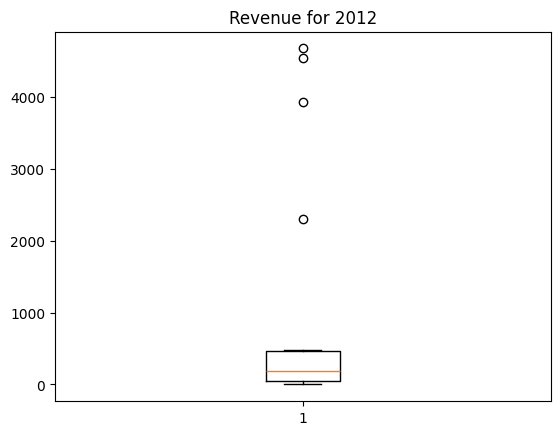

In [55]:
# Bar plot representation of 2012 company's revenue.
plt.boxplot(rev_2012['revt'])
plt.title('Revenue for 2012')
plt.show()

#### <font color="green">Summary of 2012 revenue</font>

I use box plot for descriptive data analysis. Here are the values in 2012:
1. The minimum is 0
2. First Quartile (Q1): about 50
3. Median: about 200
4. Third Quartile (Q3): about 500
5. Maximum: 4672.000

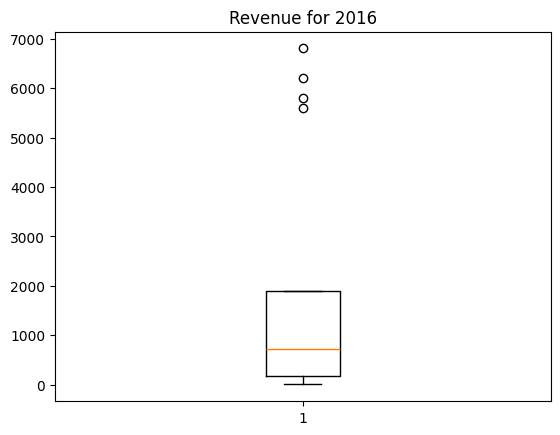

In [56]:
# Use box plot to represent 2012 data.
rev_2016 = dff_econ_ann2_real_estate_agts_n_mgr_wo_na.loc[dff_econ_ann2_real_estate_agts_n_mgr_wo_na['year'] == 2016]
plt.boxplot(rev_2016['revt'])
plt.title('Revenue for 2016')
plt.show()

#### <font color="green">Summary of 2016 revenue</font>

I use box plots for descriptive data analysis. Here are the values in 2016:
1. The minimum is about 10
2. First Quartile (Q1): about 150
3. Median: about 750
4. Third Quartile (Q3): about 1850
5. Maximum: 6803.800

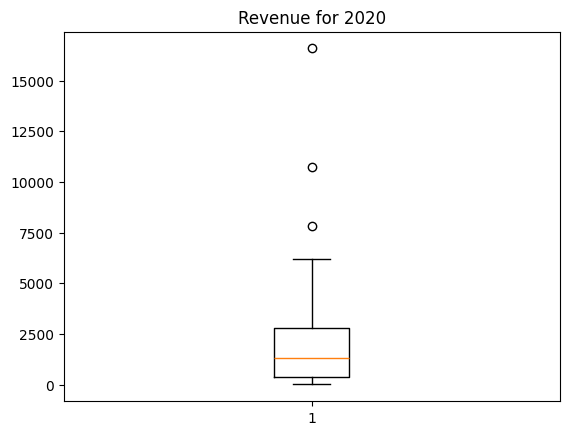

In [57]:
# Use box plot to represent 2020 data.
rev_2020 = dff_econ_ann2_real_estate_agts_n_mgr_wo_na.loc[dff_econ_ann2_real_estate_agts_n_mgr_wo_na['year'] == 2020]
plt.boxplot(rev_2020['revt'])
plt.title('Revenue for 2020')
plt.show()

#### <font color="green">Summary of 2020 revenue</font>

I use box plots for descriptive data analysis. Here are the values in 2020:
1. The minimum is about 2.5
2. First Quartile (Q1): about 270
3. Median: about 750
4. Third Quartile (Q3): about 2700
5. Maximum: about 16589.9

#### <font color="blue">Correllation metrics</font>

In [71]:
# Correlation metrics for dataset.
dff_econ = dff_econ_ann2_real_estate_agts_n_mgr_wo_na[['year','effective_rate','gvkey','revt','ni']]
dff_econ_cor = dff_econ.corr()
dff_econ_cor

,year,effective_rate,gvkey,revt,ni
year,1.000000,0.530522,-0.353794,0.303933,-0.040019
effective_rate,0.530522,1.000000,-0.214936,0.199931,-0.021123
gvkey,-0.353794,-0.214936,1.000000,0.102121,0.177864
revt,0.303933,0.199931,0.102121,1.000000,0.339191
ni,-0.040019,-0.021123,0.177864,0.339191,1.000000


#### <font color="green">Analysis on correlation</font>

Based on correlation coefficients, there is not a strong relationship between any of the pairs of variables.

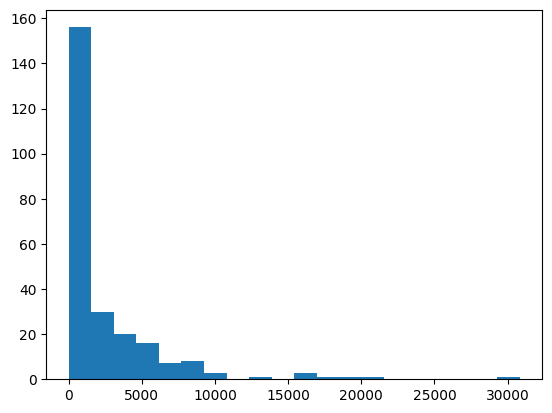

In [75]:
# Confirm with Histogram.
plt.hist(dff_econ_ann2_real_estate_agts_n_mgr_wo_na['revt'],bins=20)
plt.show()

#### <font color="green">Histogram result interpretation</font>

Revenue is significantly positively skewed, it is difficult to do regression.

### <font color='blue'>Regression<font>

In [69]:
# import regression statistical models packages.
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Log transformation

Let's do log transformation to see impact on revenue.

In [76]:
# Log transformation on revenue.
dff_econ_ann2_real_estate_agts_n_mgr_wo_na['norm'] = (1+dff_econ_ann2_real_estate_agts_n_mgr_wo_na.revt)/2
dff_econ_ann2_real_estate_agts_n_mgr_wo_na['log_revt'] = np.log(dff_econ_ann2_real_estate_agts_n_mgr_wo_na['norm'])
dff_econ_ann2_real_estate_agts_n_mgr_wo_na.head()

,year,effective_rate,cik,gvkey,datadate,conm,revt,ni,norm,log_revt
0,2010,0.176247,0001328208,165463,2010-12-31,GOLDEN GATE PARTNERS INC,0.652,-0.705,0.8260,-0.191161
1,2010,0.176247,0001477324,184116,2010-12-31,IFM INVESTMENTS LTD,80.429,-24.581,40.7145,3.706584
2,2010,0.176247,0001497862,185854,2010-12-31,SYSWIN INC -ADR,95.306,28.725,48.1530,3.874383
3,2010,0.176247,0001408100,025632,2010-12-31,KENNEDY-WILSON HOLDINGS INC,50.536,3.506,25.7680,3.249133
4,2010,0.176247,0001033032,064867,2010-12-31,SILVERLEAF RESORTS INC,226.011,5.775,113.5055,4.731851


#### <font color='blue'>Control variables</font>

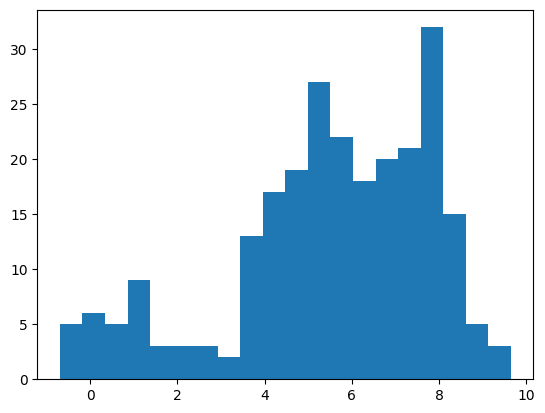

In [92]:
# Confirm with Histogram on log_revt column.
plt.hist(dff_econ_ann2_real_estate_agts_n_mgr_wo_na['log_revt'],bins=20)
plt.show()

#### <font color="green">Histogram result interpretation after log_revt</font>

The log value of revenue is better skewed, it is in better shape to do regression.

In [93]:
# Regression
model = smf.ols(formula='log_revt ~ effective_rate+year', data=dff_econ_ann2_real_estate_agts_n_mgr_wo_na)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_revt   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     13.64
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.42e-06
Time:                        19:37:28   Log-Likelihood:                -550.06
No. Observations:                 248   AIC:                             1106.
Df Residuals:                     245   BIC:                             1117.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -324.8966     86.004     -3.

### <font color='green'>Result interpretation</font>

Prob (F-statistic) = 2.42e-06 = 0.00000242, is less than 0.1, this regression analysis can be considered.

R-squared is 10%; this model explains only 10% of the variance of the dependent variable (revt).

The coefficient on year is 0.1638, which means the year is positively associated with retailers' revenues. This coefficient is statistically significant at p<0.01 level.

In [95]:
econ_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  248 non-null    int32         
 1   Thousands of Persons  248 non-null    float64       
 2   cik                   248 non-null    object        
 3   gvkey                 248 non-null    object        
 4   datadate              248 non-null    datetime64[ns]
 5   conm                  248 non-null    object        
 6   revt                  248 non-null    float64       
 7   ni                    248 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 14.7+ KB


In [96]:
# Combined dff and labor force economic data.
dff_labor_force_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            248 non-null    int32         
 1   effective_rate  248 non-null    float64       
 2   cik             248 non-null    object        
 3   gvkey           248 non-null    object        
 4   datadate        248 non-null    datetime64[ns]
 5   conm            248 non-null    object        
 6   revt            248 non-null    float64       
 7   ni              248 non-null    float64       
 8   house income    248 non-null    float64       
 9   index           248 non-null    int64         
 10  month           248 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(3)
memory usage: 19.5+ KB


### <font color="red">Analysis </font>

We are performing graph analysis on one of the datasets. I am going to do an analysis on `dff_labor_force_econ` dataset, which is merged dataset.

I am going to present the impact on revenue during the pandemic.
1. 2019 - Prepandemic year
2. 2020 - Pandemic year

In [97]:
# Filter data for 2019.
rev_2019 = dff_labor_force_econ.loc[dff_labor_force_econ['year'] == 2019]

# Verify filtered data.
rev_2019

,year,effective_rate,cik,gvkey,datadate,conm,revt,ni,house income,index,month
151,2019,2.15726,0001382821,032102,2019-12-31,REDFIN CORP,779.796,-80.805,1435.333333,86,12
152,2019,2.15726,0001628369,033809,2019-12-31,CUSHMAN & WAKEFIELD,8751.000,0.200,1435.333333,93,12
153,2019,2.15726,0001809587,036798,2019-12-31,KE HOLDINGS INC,6608.486,-313.593,1435.333333,98,12
154,2019,2.15726,0001581091,018578,2019-12-31,RE/MAX HOLDINGS INC,282.293,25.040,1435.333333,74,12
155,2019,2.15726,0001637810,024116,2019-12-31,FIRSTSERVICE CORP,2407.410,-251.610,1435.333333,133,12
156,2019,2.15726,0001741534,034003,2019-12-31,MDJM LTD,5.680,0.453,1435.333333,22,12
157,2019,2.15726,0001878897,040417,2019-12-31,DOUGLAS ELLIMAN INC,784.108,8.459,1435.333333,38,12
158,2019,2.15726,0001361658,174729,2019-12-31,TRAVEL PLUS LEISURE CO,4043.000,507.000,1435.333333,52,12
159,2019,2.15726,0001690680,032748,2019-12-31,NEWMARK GROUP INC,2218.132,117.305,1435.333333,15,12
160,2019,2.15726,0001753886,160207,2019-12-31,STONEMOR INC,289.522,-151.942,1435.333333,243,12


In [98]:
# Regression
model = smf.ols(formula='revt ~ gvkey', data=rev_2019)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   revt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                nan
Time:                        20:18:59   Log-Likelihood:                 471.30
No. Observations:                  19   AIC:                            -904.6
Df Residuals:                       0   BIC:                            -886.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1452.4550        inf     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


#### <font color="green">Analysis</font>

We cannot use this for regression analysis as the F-stat is NaN.

***

In [99]:
model = smf.ols(formula='revt ~ ni', data=rev_2019)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   revt   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     3.446
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0808
Time:                        20:19:34   Log-Likelihood:                -183.80
No. Observations:                  19   AIC:                             371.6
Df Residuals:                      17   BIC:                             373.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3077.1158    933.038      3.298      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### <font color="green">Analysis</font>

Prob (F-statistic) is less than 0.1, this regression analysis can be considered.

R-squared is 16.9% - i.e. 16.9% of revenue is explained by this model.

The coefficient on ni is 7.6971, which means net income is positively associated with retailers' revenues. This coefficient is statistically significant at p>0.1 level.

***

In [100]:
model = smf.ols(formula='revt ~ ni+index', data=rev_2019)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   revt   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2.453
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.118
Time:                        20:33:25   Log-Likelihood:                -183.01
No. Observations:                  19   AIC:                             372.0
Df Residuals:                      16   BIC:                             374.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1517.4525   1615.610      0.939      0.3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### <font color="green">Analysis</font>

Prob (F-statistic) is greater than 0.1, this regression analysis cannot be considered. Even though 23.5% of revenue is explained by this model.

***

In [101]:
# ReMax componay dataset.
rev_remax = dff_labor_force_econ.loc[dff_labor_force_econ['gvkey'] == '018578']

In [102]:
# Verify data for ReMax.
rev_remax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 20 to 226
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            12 non-null     int32         
 1   effective_rate  12 non-null     float64       
 2   cik             12 non-null     object        
 3   gvkey           12 non-null     object        
 4   datadate        12 non-null     datetime64[ns]
 5   conm            12 non-null     object        
 6   revt            12 non-null     float64       
 7   ni              12 non-null     float64       
 8   house income    12 non-null     float64       
 9   index           12 non-null     int64         
 10  month           12 non-null     int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(3)
memory usage: 1.0+ KB


In [103]:
# Entire dataset.
rev_remax

,year,effective_rate,cik,gvkey,datadate,conm,revt,ni,house income,index,month
20,2011,0.101507,0001581091,018578,2011-12-31,RE/MAX HOLDINGS INC,138.302,24.249,2152.166667,66,12
36,2012,0.140574,0001581091,018578,2012-12-31,RE/MAX HOLDINGS INC,143.677,33.324,2022.500000,67,12
57,2013,0.107342,0001581091,018578,2013-12-31,RE/MAX HOLDINGS INC,158.862,1.506,1932.666667,68,12
74,2014,0.088493,0001581091,018578,2014-12-31,RE/MAX HOLDINGS INC,170.984,13.436,1873.166667,69,12
87,2015,0.133726,0001581091,018578,2015-12-31,RE/MAX HOLDINGS INC,176.868,16.655,1759.083333,70,12
104,2016,0.393197,0001581091,018578,2016-12-31,RE/MAX HOLDINGS INC,176.302,22.737,1719.833333,71,12
121,2017,1.002959,0001581091,018578,2017-12-31,RE/MAX HOLDINGS INC,197.929,12.815,1654.166667,72,12
137,2018,1.834932,0001581091,018578,2018-12-31,RE/MAX HOLDINGS INC,212.626,27.044,1540.166667,73,12
154,2019,2.157260,0001581091,018578,2019-12-31,RE/MAX HOLDINGS INC,282.293,25.040,1435.333333,74,12
173,2020,0.372240,0001581091,018578,2020-12-31,RE/MAX HOLDINGS INC,266.001,11.250,3836.666667,75,12


In [104]:
# Effect of rate on revt of ReMax.
model = smf.ols(formula='revt ~ effective_rate', data=rev_remax)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   revt   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     3.452
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0928
Time:                        20:43:52   Log-Likelihood:                -66.218
No. Observations:                  12   AIC:                             136.4
Df Residuals:                      10   BIC:                             137.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        185.4333     25.626      7.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### <font color="green">Analysis</font>

Prob (F-statistic) is less than 0.1, this regression analysis can be considered.

R-squared is 25.7% - i.e. 25.7% of revenue is explained by this model.

The coefficient on ni is 47.1092, which means the effective rate is positively associated with ReMax's revenues. This coefficient is statistically significant at p<0.1 level.